In [51]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

In [2]:
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Distribution visualization

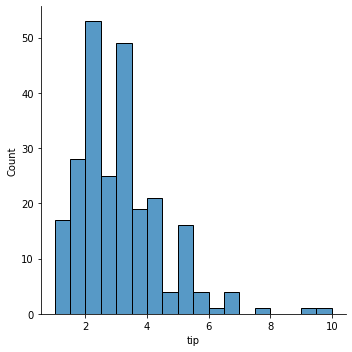

In [3]:
sns.displot(df["tip"], kde=False)

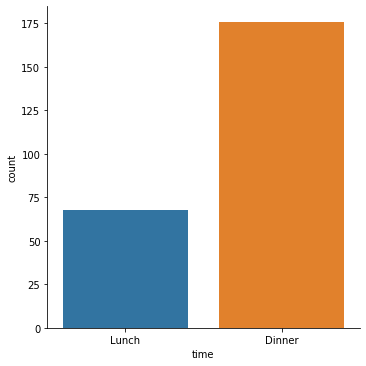

In [4]:
sns.catplot(x="time", data=df, kind="count")

## Mean

In [5]:
np.mean(df["tip_rate"])

0.16080258172250472

In [6]:
df["tip_rate"].mean()

0.16080258172250472

In [7]:
df.groupby("sex").mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


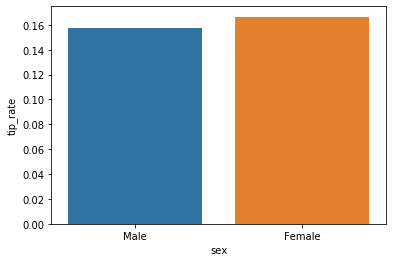

In [8]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None)

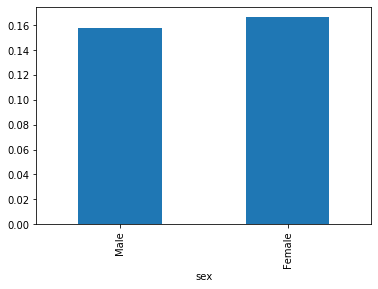

In [9]:
df.groupby("sex").mean()["tip_rate"].plot(kind="bar")

## Median

In [10]:
np.median(df["tip_rate"])

0.15476977125802577

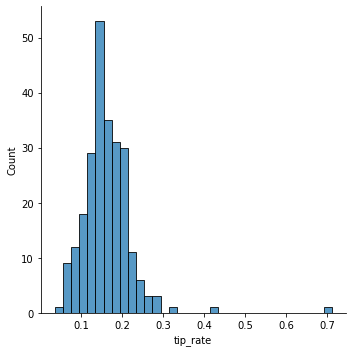

In [11]:
sns.displot(df["tip_rate"], kde=False)

In [12]:
df["tip_rate"].median()

0.15476977125802577

In [13]:
df.groupby("sex").median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


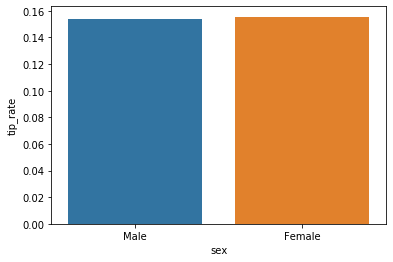

In [14]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None, estimator=np.median)

In [15]:
df.sort_values("tip_rate", ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## Mode

In [16]:
df["tip_rate"].mode()

0    0.144823
1    0.153846
dtype: float64

In [17]:
mode, count = stats.mode(df)

In [18]:
mode

array([[13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2, 0.1448225923244026]],
      dtype=object)

In [19]:
count

array([[  3,  33, 157, 151,  87, 176, 156,   2]])

## Range

In [20]:
np.min(df["tip"])

1.0

In [21]:
df["tip"].min()

1.0

In [22]:
df.groupby("sex").min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [23]:
df.groupby("sex").max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## Quartile

In [24]:
np.quantile(df["tip_rate"], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [25]:
df["tip_rate"].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [26]:
stats.iqr(df["tip_rate"])

0.06234812458689154

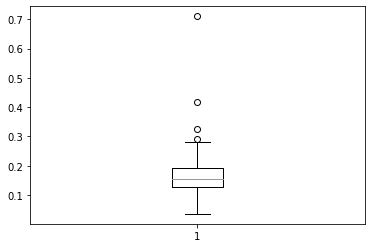

In [27]:
plt.boxplot(df["tip_rate"], )
plt.show()

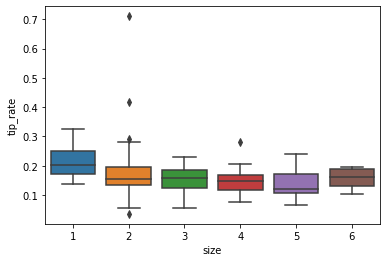

In [28]:
sns.boxplot(x="size", y="tip_rate", data=df)

## Variance

In [29]:
np.var(df["tip_rate"])

0.00371452800135469

## Standard Deviation

In [30]:
np.std(df["tip_rate"])

0.060946927743362835

In [31]:
np.sqrt(np.var(df["tip_rate"]))

0.060946927743362835

In [32]:
tip_mean = df["tip"].mean()

## Covariance

In [37]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [39]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## Correlation Coefficient

In [43]:
np.corrcoef(df["total_bill"], df["tip"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [46]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [47]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


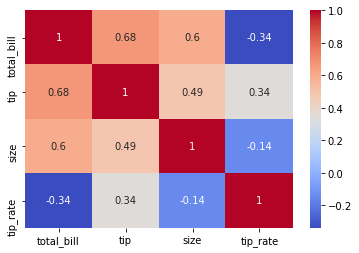

In [49]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

## Assitciation (contingency table, chi2)

In [62]:
cont_table = pd.crosstab(df["sex"], df["time"])
cont_table

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [76]:
chi2, _, _, ef = stats.chi2_contingency(cont_table, correction=False)
print(chi2)
ef

10.277251918677742


array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]])

## Cramers

In [77]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(cont_table, correction=False)
    N = len(x)
    min_d = min(cont_table.shape)
    V = np.sqrt(chi2 / ((min_d-1)*N))
    return V

In [78]:
cramers_v(df["sex"], df["time"])

0.20523129613344476